# Chapter 6: High Performance Computing
Module 5 of Phys212/Biol212 class
### by Ilya Nemenman, 2016-2019

## Defining High Performance Computing

<font color='pink'>Note to self: need to expand the introduction</font>
Nowadays news are full with articles about new technological breakthroughs in artificial intelligence: self-driving cars, automatic translation, and even computer-generated art. What makes all of this possible, among other things, is a dramatic increase in our computational capabilities in the last decade. Interestingly, the speed of computer processors has not changed that much over this time -- an individual processor now is only a bit faster than is used to be ten years ago. What has changed is that we figured out how to put more processors into a single computer (and sometimes dramatically more -- literally thousands of specialized processors in some video cards) and how to make all of these processors to work collectively on solving large computational problems we want to solve. In this module, we discuss the basics of such parallel computing and will figure out how to implement it on your laptops.

What is high performance computing? To answer this, we need to define a series of terms. 
 - **Processor** , or Central Processing Unit (**CPU**): The *brain* of the computer, the part in which most computing operations are controlled and executed. 
 - **Serial Processing**: Execution of a single program step by step on one CPU.
 - **Sequential Processing**: Execution of multiple programs on a single CPU in a sequence.
 - **Concurrent Processing**: Execution of multiple programs at the same time. 
 - **Parallel Processing**: Execution of multiple programs (or parts of the same one) on multiple CPUs. 
 - **High Performance Computing**: It is basically another name for solving computational problems concurrently on multiple CPUs.
 
It gets a bit more complicated. One can have serial and sequential processing (completing one task before starting the other on a single CPU). One can also have serial and concurrent processing (alternating between two or more tasks on the same single CPU). Finally, one can have triw parallel and concurrent processing, which means executing multiple tasks simultaneously at the same instant of time on multiple CPUs.

### Organization of Parallel Computing
What are the different ways of organizing parallel processing? We can develop the intuition by considering how you can arrange for multiple people in a group to do a certain complex task that consists of many different subtasks. For example, let's suppose that a group of people are arriving to a supermarket to buy a long list of supplies for a party. How should the long shopping list be split among the group? There are many different ways of doing this.
 - The simplest option is not to delegate different parts of the shopping list to different people, but to have just one person to complete all of the steps of the task. This is equivalent to sequential processing.
 - The second option is to have the group captain assign a list of subtasks to each of the people in the group, and let them all focus on each of their assigned tasks. This incurs communication cost. First, the partitioning of the full list of tasks into pieces must be done, and then these sublists must be communicated to the people. When they complete their individual tasks, the results of the completion must be communicated to the leader. Further, there are additional inefficiencies. While the task is being partitioned, the people will be waiting for their assignments, doing nothing. Then some of them will finish their subtasks before the others, and will again wait, doing nothing.
 - The arrangement above may possibly be improved, where whenever a person finishes his/her task, s/he starts helping the others who are still doing theirs. But this is easier said then done. Whom should they help? To know this, each person must be constantly communicating his/her progress, either broadcasting it to everyone in the group, or at least sending it to the captain, so that either everyone knows who needs help, or the captain can tell everyone. Further, when a helper arrives, the task that is running behind now needs to be partitioned again, which will take additional time and resources.
 - To avoid some of these problems, one may want to duplicate the tasks originally, but prioritize them, so that every person first works on his/her task, and then switches on other pre-assignees tasks, constantly reporting results. You can fill in the gaps of what kind of problems this solution carries with itself.

>### Your turn
Can you suggest other arrangements of how the tasks can be divided over multiple individuals?

Note that, in all of these (and yours) suggestion, the more complicated the arrangement is, the more communication needs to be done. And communication takes time -- so that, at a certain point, communication cost outweighs the savings one will generate from a complex task-partitioning scheme.

With these different arrangements, it makes sense to have a bit finer characterization of concurrent / parallel processing. 
 - **Parallel processing** per se: Collection of connected, tightly coupled, strongly communicating processors concurrently solving a problem.
 - **Distributed processing**: Loosely coupled processors, perhaps great distances from each other, working concurrently on problems with minimal communication among them.

True parallel processing is further distinguished by how memory of the computers is organized
 - **Shared memory**: Parallel processors access the same memory during concurrent processing, requiring minimal communication beyond the shared memory.
 - **Distributed memory**: Each processor has it's own memory to operate with, and synchronization of tasks is achieved through communication.

Crucially, a program written for sequential processing won't execute on many processors. It needs to be **parallelized** or **scaled** to many processors. This usually involves careful consideration of how concurrent processing will be organized, how the tasks will be partitioned, how multiple data streams and execution streams will be synchronized, etc. A useful metric of how well the code is parallelized is the **speedup**, the ratio of the time it takes to execute it on $n$ processors compared to execution on $1$. It's essentially impossible to achieve the speedup of larger than $n$, and it is usually less than $n$ due to communication costs. 

### Types of parallel algorithms
<font color='pink'>Note to self: need pictures of different parallelization schemes.</font>
Some problems are easier to parallelize than others, and different approaches are required for parallelization. These include:
 - **Embarrassingly parallel algorithms**: The task can be divided into subtasks that have virtually no communication.
Typically problems such as generating statistics (e.g., producing many DLA clusters of Module 4) are embarrassingly parallelizable. For example, you could have run multiple Jupyter notebooks at the same time, and each would produce a single cluster, whose lengths can then be averaged.
 - **Data partitioning algorithms**: For example, when calculating a larger sum, the data set can be partitioned into parts, each part can be summed independently, and then the sums will be added. Here a *root* process partitions the data into subsets, and then collects the results. The root has a privileged state -- it distributes the tasks, but doesn't execute them itself.
 - **Divide and conquer algorithms**: Work is done without a root. Here each processor gets a task and, if it can't execute it in a requested time, it subdivides the task into two, leaves one half for itself, and recruits another processor for the remaining half. Both of the processors then continue doing the same, until each of the recruited processors has a manageable task. When the tasks are completed, each processor reports its results to the processor who originally gave it the task. 
 - **Coarsening algorithms**: Here the processors solve the problem on multiple scales. <font color='pink'>Note to self: more to be added.</font>

For all of these algorithms, it is crucial to think how the data must be organized to speed up communication.

## Problems to be solved with parallel processing
We already saw a few such problems in Module 4. Essentially every problem solved using agent-based simulations can be parallelized using embarrassingly parallelizeable approach. Embarrassing parallelization won't work, however, for approaches using ceullar automata. The problems we discussed last time (DLA, annihilation) can be solved by data partitioning, where each one of the processors analyzes a sub-part of the lattice.

There is a special type of cellular automata, for which parallel processing is usually used (and, in fact, was developed for originally). These are called *partial differential equations*. Consider a situation where one is trying to predict weather, or, for simplicity, just the temperature $T$ over some extended spatial range, which is what weather forcasters routinely do. So the variable $T$ that we care about depends on the spatial coordinates in addition to time, $T=T(x,y,z,t)$. This is in contrast to all previous examples we considered, where the dynamical variables were few, and they depended just on time, such as the coordinate and the angular velocity of the pendulum, $\theta(t), \omega(t)$, or the concentration of nutrients and the number of bacteria, $\rho(t),n(t)$. Variable that are space and time dependent, like the temperature, are known as *fields*. On a digital computer, we usually approximate the continuous coordinates $x,y,z$ as a grid, and so $T(x,y,z,t)$ becomes a set of variables $T(x_i,y_j,z_k,t)$, with the dimensionality of the set being $N=\frac{L_x}{\Delta x}\frac{L_y}{\Delta y}\frac{L_z}{\Delta z}\sim \left(\frac{L_x}{\Delta x}\right)^d$, where $L_x$ is the linear span of the system, $\Delta x$ is the lattice spacing (and similarly for $y$ and $z$), and $d=3$ is the dimension. Even for reazonably small $\frac{L_x}{\Delta x}\sim 100$, the number of dynamical variables we need to store to describe the dynamics of $T$ is $N\sim 10^6$. That is, the spatially extended dynamical system is equivalent to a dynamical system with very many (potentially millions) dynamical variables. As you have observed earlier, solving ODEs for even a few dynamical variables can take a substantial amount of time. It is also clear that this time complexity is going to scale as, at least, $O(N)$, and potentially even worse if many variables interact with each other. Thus the need to use all of the available computational resources (and hence parallelizing the code) for such spatially extended simulations is obvious. 

>### <font color='green'>Track 2 </font> 
Notice that the probability distribution of having a certain number of molecules in the Chemical Master Equation (CME), which we studied in Track 2 in the previous module, depends on that number as well as on time, $P=P(n,t)$. So while the CME does not describe a function $P(n,t)$ for a continuous $n$, it becomes very similar to the discretized dynamics of continuous fields, such as $T$, when both are represented on a digital computer. The dimensionality of the dynamics of the CME thus scales as $N\sim \prod N_{{\rm max},i}\sim N_{\rm max}^d$, where $N_{{\rm max},i}$ is the maximum allowable number of molecules of a chemical species $i$ involved in the process, and $d$ is the dimensionality, or the number of these species. Thus if the number of chemical species involved in the dynamics is more than a few (and it can be arbitrary!), the CME becomes a system of astronomically many coupled ODEs, and parallelizing the code becomes even more important than for fields in real spatial dimensions.  <font color='pink'>Note to self: maybe stick with CME instead of diffusion?  We will ontroduce one of those here -- the heat diffusion equation, but the Chemical Master Equation from Track 2 in Module 4 is a related example.</font> 

### Newton's law of cooling and Fourier's law of heat conductance
Let's start with a simple example. Suppose you have two bodies in contact with temperatures $T_1$ and $T_2$. How do their temperatures depend on time? To develop a mathematical model of this process, we ... to be continued...


### Partial Differential Equations (PDEs): The Diffusion Equation
The heat diffusion equation -- one of many partial differential equations (differential equations involving partial derivatives).
 - Fick's first law of diffusion $J=-D\frac{d\phi}{dx}$ or $\vec{J}=-D\nabla \phi$ (also known as Newton's law of cooling if $\phi=T$, or the Fourier law of heat conduction).
 - Fick's second law of diffusion $\partial_t \phi = -D\nabla^2 \phi$.
 - Finite difference form of the heat diffusion equation; need boundary conditions to complete the solution.
 - Boundary conditions (implemented with extending the grid matrix):
    - Absorbing
    - Reflecting
    - Periodic

### Solving the Diffusion Equation using Python
Talk about instabilities-- TBC.

In [5]:
# Initialization block
import numpy as np
import time
import matplotlib.pyplot as plt

# The function below implements the single step of the diffusion equation
def diffusion(D, dt, dx, u):
    """ compute one time step of diffusion
    D: diffusion constant
    dt: step size in time
    dx: step size in space
    u: concentration on lattice points of diffusing quantity, assumed (L+2)x(L+2) because of the
       boundary conditions
    return: u after one time step 

    note that because of the boundary conditions, 
    the assumed lattice has a boundary belt all around it, so that the lattice is (L+1)x(L+2)"""
    
    tmp = np.empty((u.shape[0] - 2, u.shape[1] - 2))  
        
    for x in np.arange(1, u.shape[0] - 1):
        for y in np.arange(1, u.shape[1] - 1):
            tmp[x - 1, y - 1] = u[x, y] + dt * D * (u[x - 1, y] + u[x, y - 1] - 4 * u[x, y] + 
                                                    u[x + 1, y] + u[x, y + 1]) / dx**2
    
    # we return the lattice LxL
    return tmp

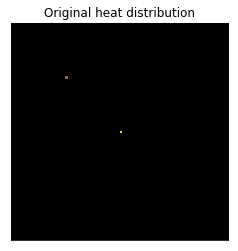

Sequential processing took 4.013963937759399s


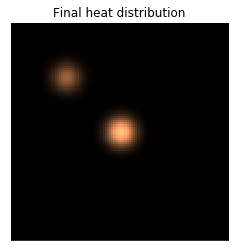

In [7]:
# define integration step sizes
dx = 1
dt = 1

L = 100   # system shape is square for convenience
T = 100   # integration time
D = 0.1   # diffusion constant

# initial heat distribution
grid = np.zeros(2 * [L * int(dx**-1)])
gridsize = grid.shape
grid[int(gridsize[0] / 2), int(gridsize[1] / 2)] = 70   # put a point source in the center, with intensity 70
grid[int(gridsize[0] / 4), int(gridsize[1] / 4)] = 35   # put a point source at a quarter corner, intensity 35


def sequential(grid, T, dt):
    ''' sequential processing solution '''
    ts = time.time()  # measure computation time
    for t in np.arange(T/dt):
        # insert upper and lower boundary: reflecting boundary
        tmp = np.insert(grid, 0, grid[0, :], axis=0)
        tmp = np.vstack((tmp, grid[-1, :]))
        # insert left and right boundary: reflecting boundary
        tmp = np.insert(tmp, 0, tmp[:, 0], axis=1)
        tmp = np.hstack((tmp, np.array([tmp[:, -1]]).T)) # note: slicing gives a row vector therefore transpose to get column vector
        grid = diffusion(D, dt, dx, tmp)
    print('Sequential processing took {}s'.format(time.time() - ts))
    return grid

plt.imshow(grid, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); 
plt.yticks([]);
plt.title('Original heat distribution')
plt.show()
plt.imshow(sequential(grid, T, dt), cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); 
plt.yticks([]);
plt.title('Final heat distribution')
plt.show()

>### Your turn
Time the solution of the problem for different $L$. How do you expect the complexity of the problem to grown with $L$? How does it grow with $L$?

>### Your turn
The code above does two nested `for` loops over the grid. Vectorize the code.

>### Your turn
Explore other initial conditions (absorbing and periodic) and explore how the heat diffuses in this system.

## Multiprocessing module
It is crucial that you read the documentation for this module and understand it well https://docs.python.org/2/library/multiprocessing.html

In [26]:
import multiprocessing as mp

print('Number of processors =' +str(mp.cpu_count()) +'.')

Number of processors =4.


In [28]:
# defining function of integers
def sumnums(nums):
    s = 0
    for x in nums:
        s += x
    return s

maxnum = 2**25    # sum integers up to (not including) this number

if __name__=='__main__':
    # parallel processing
    n_proc = 10
    ts = time.time()  # measure computation time
    pool = mp.Pool(processes = n_proc)    # on my laptop I have 4 cores
    numlist = [range(int(maxnum/n_proc*i), int(maxnum/n_proc*(i+1))) for i in range(n_proc)]   # list of list of chopped up numbers
    subsums = pool.map(sumnums, numlist)
    result_p = sumnums(subsums)
    print('Parallel processing took {}s'.format(time.time() - ts))
    
    # sequential processing
    ts = time.time()  # measure computation time
    result_s = sumnums(range(maxnum))
    print('Sequential processing took {}s'.format(time.time() - ts))
    
    print("sum numbers from 0 to %d - parallel: %d, sequential healthcheck: %d" % (maxnum, result_p, result_s))

Parallel processing took 1.1783909797668457s
Sequential processing took 2.036456823348999s
sum numbers from 0 to 33554432 - parallel: 562949936644096, sequential healthcheck: 562949936644096


### Diffusion on multiple processors
Let's recode the single processor version now on multiple processors instead.

In [29]:
from functools import partial
def parallel(grid, T, dt, units):
    ''' parallel processing solution '''
    # define number of processes
    units = 4
    p = mp.Pool(units)

    # define how many partitions of grid in x and y direction and their length
    (nx, ny) = (int(units / 2), 2)
    lx = int(gridsize[0] / nx)
    ly = int(gridsize[1] / ny)

    # this makes sure that D, dt, dx are the same when distributed over processes
    # for integration, so the only interface parameter that changes is the grid
    func = partial(diffusion, D, dt, dx)
    ts = time.time()  # measure computation time
    for t in np.arange(T/dt):  # note numpy.arange is rounding up floating points
        data = []
        # prepare data to be distributed among workers
        # 1. insert boundary conditions and partition data
        grid = np.insert(grid, 0, grid[0, :], axis=0)       # top
        grid = np.vstack((grid, grid[-1, :]))               # bottom
        grid = np.insert(grid, 0, grid[:, 0], axis=1)       # left
        grid = np.hstack((grid, np.array([grid[:, -1]]).T))   # right
        # partition into subgrids
        for i in range(nx):
            for j in range(ny):
                # subgrid
                subg = grid[i * lx + 1:(i+1) * lx + 1, j * ly + 1:(j+1) * ly + 1]
                subg = np.insert(subg, 0, grid[i * lx, j * ly + 1:(j+1) * ly + 1], axis=0)  # upper subgrid boundary
                subg = np.vstack((subg, grid[(i+1) * lx + 1, j * ly + 1:(j+1) * ly + 1]))  # lower subgrid boundary
                subg = np.insert(subg, 0, grid[i * lx:(i+1) * lx + 2, j * ly], axis=1)  # left subgrid boundary
                subg = np.hstack((subg, np.array([grid[i * lx:(i+1) * lx + 2, (j+1) * ly + 1]]).T))  # right subgrid boundary
                # collect subgrids in list to be distributed over processes
                data.append(subg)
        # 2. divide among workers
        results = p.map(func, data)
        grid = np.vstack([np.hstack((results[i * ny:(i+1) * ny])) for i in range(nx)])
    print('Concurrent processing took {}s'.format(time.time() - ts)) # alternative to write variable to string as used above
    return grid

Sequential processing took 3.694476842880249s


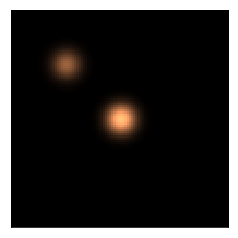

Concurrent processing took 2.124263286590576s


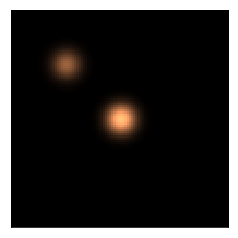

In [30]:
if __name__=='__main__':
    grid_s = np.copy(grid)  # keep original grid variable unchanged
    plt.imshow(sequential(grid_s, T, dt), cmap=plt.cm.copper, extent=[-1,1,-1,1]);
    plt.xticks([]); plt.yticks([]);
    plt.show()
    grid_p = np.copy(grid)  # keep original grid variable unchanged
    plt.imshow(parallel(grid_p, T, dt, 4), cmap=plt.cm.copper, extent=[-1,1,-1,1]);
    plt.xticks([]); plt.yticks([]);
    plt.show()

In [31]:
print('Active children ' +str(mp.active_children()))

Active children [<ForkProcess(ForkPoolWorker-95, started daemon)>, <ForkProcess(ForkPoolWorker-93, started daemon)>, <ForkProcess(ForkPoolWorker-96, started daemon)>, <ForkProcess(ForkPoolWorker-97, started daemon)>, <ForkProcess(ForkPoolWorker-98, started daemon)>, <ForkProcess(ForkPoolWorker-99, started daemon)>, <ForkProcess(ForkPoolWorker-94, started daemon)>, <ForkProcess(ForkPoolWorker-100, started daemon)>, <ForkProcess(ForkPoolWorker-101, started daemon)>, <ForkProcess(ForkPoolWorker-102, started daemon)>]


## Projects

The following three projects are available for this module. For each of these projects, you will need to develop a discretized space model of the process. You will then write code for sequential simulation of the system. Finally you will write code for simulation of the system using a pool of workers of an arbitrary size. In your report, you will need to output (besides the usual verification figures) the movies of the dynamics of the system, and a few snapshots of this dynamics for a more detailed analysis. After that, the final plot should be the time it took to solve the problem vs. the number of workers in the pool, for the number of workers going from 1 to 10 or so. What is the speedup that you observe for a different number of workers?

> ### Project 1: Conway's Game of Life (just fun)
Game of Life is a cellular automaton devised by John Conway, a mathematician, in 1970. The rules of the game are simple:
 - The game is played on a large (potentially infinite) orthogonal grid.
 - The game uses discrete time.
 - Each cell on a grid can be in two states: alive (1) or dead (0).
 - Every cell interacts with 8 of its neighbors to establish if it will be alive or dead at the next time step
 - The transition rules are
    - Any live cell with fewer than two lives neighbors dies (life is cooperative).
    - Any live cell with two or three live neighbors lives.
    - Any live cell with more than three live neighbors dies (overpopulation).
    - Any dead cell with exactly three live neighbors becomes alive (is reproduced into) .
    - All other dead cells remain dead.

> You can read more about the game in __[this Wikipedia article](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)__. Develop a model of the Game on multiple processors (as described above), and simulate it on a large lattice (few hundred by few hundred cells). Start with random initial conditions and see which examples of "living" organisms you can generate. Classify them. Plot the time it takes to evolve the system for some fixed $T$ steps vs. the number of workers in the pool.  

> ### Project 2: Reaction-diffusion in development (biophysics)
A drosophila egg can be represented as an ellipsoid of rotation of about 500 um along the longest diameter, and half as long along the shortest. To start the development of a fertilized egg, a mother fly deposits a mRNA of a certain protein (bicoid) at the tip of the egg. The protein is translated from its mRNA (you should model this as a constant influx of bicoid molecules at the tip of the egg), and starts diffusing over the 3-d volume of the embryo with the diffusion coefficient of about 20 um$^2$/s (though there are complications, and the spread of the molecule is likely not purely diffusional). While the bicoid diffuses, it also degrades with the time scale of about 3 min (again, there are complications). As a result, a gradient of bicoid gets established, and, later in development, different parts of the embryo read out their position inside the embryo by measuring the bicoid concentrations next to them. Simulate the process of establishment of the bicoid gradient on multiple cores. For this, you will need to use not cubic, but ellipsoidal boundaries and set reflecting boundary conditions on them. Still work with a cubic lattice, but make the boundary conditions band elliptical (to the extent that you can on a square lattice). You will also need to supplement every diffusion step with a reaction step accounting for the decay of the bicoid. Produce a movie of the concentration field in the cross-section of the embryo. Graph the concentration along the major axis in steady state. Explore how this concentration depends on the diffusion constant and the decay time. How does the time to the steady state depend on the diffusion constant? Finally, plot the time it takes to evolve the system for some fixed $T$ steps vs. the number of workers in the pool.   

> ### <font color=green>Track 2: Project 3: Repressilator (biochemical kinetics)</font>
Recall <font color=green>Track 2: Master Equation and the dynamics of the probability distribution</font> section in Chapter 5, in which we studied how to model the dynamics of probability distributions of a number of molecules. Let's now study a slightly more complicated system of three interacting genes, $A,B,C$, arranged in a logical circle: gene $A$ suppresses $B$, $B$ suppresses $C$, and $C$ suppresses $A$. This is known as the "repressilator* circuit, which was __[developed in *E. coli* by Elowitz and Leibler](http://elowitz.caltech.edu/publications/Repressilator.pdf)__. The deterministic dynamics of this system is governed by the following equations. First, each of the three types of proteins are translated from messenger RNAs (mRNAs) $$\frac{dp_i}{dt}=a m_i-b p_i,$$ where $i=(A,B,C)$, $a$ and $b$ are constant rates, and $p$ and $m$ are protein and mRNA concentrations, respectively. In their turn, the production of mRNA is affected by the proteins that repress them, $$\frac{dm_i}{dt}=\alpha_0+\frac{\alpha}{K^2+p_{i-1}^2}-\beta m_i,$$ where $K,\alpha,\beta$ are constants, and protein species $A-1$ corresponds to $C$. This system is known to develop oscillations, where concentration of each of the proteins go up and down periodically. Write the master equation for this system following the approach we took in Chapter 5, and solve it on multiple cores (the lattice that you will have to build to represent the state of the system will be 6 dimensional: three proteins and three mRNAs). Find parameter values that make the system oscillate (feel free to use the original article by Elowitz and Leibler as an inspiration for parameter values). Show the graphs of the probability distribution $P(p_A)$ as a function of time. Finally, plot the time it takes to evolve the system for some fixed $T$ steps vs. the number of workers in the pool. 

> ### <font color=green>Track 2: Project 4: Belousov-Zhabotinsky reaction (chemical physics)</font>
__[Belousov-Zhabotinsky reaction](https://en.wikipedia.org/wiki/Belousov–Zhabotinsky_reaction)__ is a classic example of a nonlinear chemical oscillator based on propagation of waves in excitable media. It's typically modeled as an __[oregonator](https://en.wikipedia.org/wiki/Oregonator)__, with three differential equations describing species X, Y, and Z. Another good introduction is in __[Scholarpedia](http://www.scholarpedia.org/article/Oregonator)__; focus especially on the scaled form in Eqs. (4,5,6)). Now imagine that all species diffuse with similar (but not the same) diffusion constants. Set up such simulations on a square grid in 2d -- you need to keep track of concentration of all three species on every grid point, and, in addition to diffusion, there will be mass-action reactions on every site. Solbe this system using multiple cores and explore various diffusion constants. Find the parameter range at which the system, started with random initial conditions, develops the beautiful spiral waves seen in the first link above? Produce a movie of these waves. Finally, plot the time it takes to evolve the system for some fixed $T$ steps vs. the number of workers in the pool. 
